In [3]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import *

In [21]:
spec_names=('gap', 'shifted_gap','shifted_gap_2', 'log10_gap', 'log10_shifted_gap', 'log10_shifted_gap_2', 'ratio')
time_set= np.power(2, np.arange(40))

In [52]:
for L in [5]:
    for lambd in np.linspace(0,1,11):
        dim_loc=4
        n_dis=100
        simdict={'dim_loc': dim_loc, 'L': L, 'n_dis': n_dis}
        phi=np.pi/3
        eps=0.1
        time_set= np.power(2, np.arange(40))
        idata={'JZZ': 1.0, 'hZ': 1.0, 'hX': 1.0, 'alphas': np.array([(1-lambd)*np.exp(1j*phi)/2, 1, (1-lambd)*np.exp(-1j*phi)/2]),\
               'betas': np.array([eps,lambd, eps]), 'lambdas': np.array([eps,1,eps]),\
               'phi': phi, 'lambd': lambd}
        filename='clock4/clock4_%d_%.2f.txt' %(L,lambd)

        clockH, clockK, clockZ = clock(dim_loc, L)
        Z_mean, Z_var, Y_mean, Y_var, spectral_data, spectral_data_var = simulation(dim_loc, L, n_dis, idata, clockH, clockK, clockZ, time_set)

        with open(filename, 'wb') as f:
                for key, value in simdict.items():
                    f.write(('\n# '+key+' '+str(value)).encode('utf-8'))
                for key, value in idata.items():
                    f.write(('\n# '+key+' '+str(value)).encode('utf-8'))
                for i in range(7):
                    f.write(('\n# '+spec_names[i]+' '+str(spectral_data[i])+' '+str(spectral_data_var[i])).encode('utf-8'))
                f.write('\n# time\tRe(Z)\Im(Z)\tVar(Re(Z))\tVar(Im(Z))\n'.encode('utf-8'))
                np.savetxt(f, np.stack((time_set, np.real(Z_mean), np.imag(Z_mean),\
                            np.real(Z_var), np.imag(Z_var), np.real(Y_mean), np.imag(Y_mean),\
                                        np.real(Y_var), np.imag(Y_var)), axis=-1))

size 5 	disorder realization 0 	time elapsed 9.536352157592773
size 5 	disorder realization 1 	time elapsed 7.305302858352661
size 5 	disorder realization 2 	time elapsed 6.715191125869751
size 5 	disorder realization 3 	time elapsed 6.36557936668396
size 5 	disorder realization 4 	time elapsed 7.391925811767578
size 5 	disorder realization 5 	time elapsed 6.504539728164673
size 5 	disorder realization 6 	time elapsed 6.7051098346710205
size 5 	disorder realization 7 	time elapsed 6.985826253890991
size 5 	disorder realization 8 	time elapsed 7.1850714683532715
size 5 	disorder realization 9 	time elapsed 6.97448992729187
size 5 	disorder realization 10 	time elapsed 7.027383089065552
size 5 	disorder realization 11 	time elapsed 7.068674325942993
size 5 	disorder realization 12 	time elapsed 8.521874904632568
size 5 	disorder realization 13 	time elapsed 7.520539283752441
size 5 	disorder realization 14 	time elapsed 10.383460760116577
size 5 	disorder realization 15 	time elapsed 8.4

size 5 	disorder realization 29 	time elapsed 6.804617166519165
size 5 	disorder realization 30 	time elapsed 6.735714673995972
size 5 	disorder realization 31 	time elapsed 8.64844274520874
size 5 	disorder realization 32 	time elapsed 7.234009742736816
size 5 	disorder realization 33 	time elapsed 7.155823707580566
size 5 	disorder realization 34 	time elapsed 8.935768365859985
size 5 	disorder realization 35 	time elapsed 7.505004405975342
size 5 	disorder realization 36 	time elapsed 9.161879777908325
size 5 	disorder realization 37 	time elapsed 6.363739252090454
size 5 	disorder realization 38 	time elapsed 7.547323703765869
size 5 	disorder realization 39 	time elapsed 7.529469728469849
size 5 	disorder realization 40 	time elapsed 8.179675817489624
size 5 	disorder realization 41 	time elapsed 7.743610382080078
size 5 	disorder realization 42 	time elapsed 8.474125623703003
size 5 	disorder realization 43 	time elapsed 7.130420446395874
size 5 	disorder realization 44 	time ela

size 5 	disorder realization 58 	time elapsed 7.395914316177368
size 5 	disorder realization 59 	time elapsed 6.620153188705444
size 5 	disorder realization 60 	time elapsed 7.1463096141815186
size 5 	disorder realization 61 	time elapsed 7.125184774398804
size 5 	disorder realization 62 	time elapsed 6.665945291519165
size 5 	disorder realization 63 	time elapsed 6.607022047042847
size 5 	disorder realization 64 	time elapsed 8.747523784637451
size 5 	disorder realization 65 	time elapsed 6.430750370025635
size 5 	disorder realization 66 	time elapsed 6.383708238601685
size 5 	disorder realization 67 	time elapsed 7.335018634796143
size 5 	disorder realization 68 	time elapsed 7.115329742431641
size 5 	disorder realization 69 	time elapsed 7.862109899520874
size 5 	disorder realization 70 	time elapsed 7.92987847328186
size 5 	disorder realization 71 	time elapsed 7.752282381057739
size 5 	disorder realization 72 	time elapsed 6.452650547027588
size 5 	disorder realization 73 	time el

size 5 	disorder realization 87 	time elapsed 6.272125720977783
size 5 	disorder realization 88 	time elapsed 6.884374380111694
size 5 	disorder realization 89 	time elapsed 7.220793962478638
size 5 	disorder realization 90 	time elapsed 8.216519117355347
size 5 	disorder realization 91 	time elapsed 7.941410303115845
size 5 	disorder realization 92 	time elapsed 6.411827087402344
size 5 	disorder realization 93 	time elapsed 6.929615259170532
size 5 	disorder realization 94 	time elapsed 7.647018194198608
size 5 	disorder realization 95 	time elapsed 8.078524351119995
size 5 	disorder realization 96 	time elapsed 6.196076393127441
size 5 	disorder realization 97 	time elapsed 7.528559446334839
size 5 	disorder realization 98 	time elapsed 6.377839088439941
size 5 	disorder realization 99 	time elapsed 6.224535226821899
size 5 	disorder realization 0 	time elapsed 6.804293155670166
size 5 	disorder realization 1 	time elapsed 7.198641061782837
size 5 	disorder realization 2 	time elaps

size 5 	disorder realization 16 	time elapsed 6.574784994125366
size 5 	disorder realization 17 	time elapsed 6.649567604064941
size 5 	disorder realization 18 	time elapsed 6.524785995483398
size 5 	disorder realization 19 	time elapsed 6.617149353027344
size 5 	disorder realization 20 	time elapsed 6.441720008850098
size 5 	disorder realization 21 	time elapsed 6.4918529987335205
size 5 	disorder realization 22 	time elapsed 6.269984006881714
size 5 	disorder realization 23 	time elapsed 6.443844556808472
size 5 	disorder realization 24 	time elapsed 6.614093542098999
size 5 	disorder realization 25 	time elapsed 6.535629749298096
size 5 	disorder realization 26 	time elapsed 6.5105297565460205
size 5 	disorder realization 27 	time elapsed 6.378681182861328
size 5 	disorder realization 28 	time elapsed 6.628345727920532
size 5 	disorder realization 29 	time elapsed 6.621087312698364
size 5 	disorder realization 30 	time elapsed 6.105875253677368
size 5 	disorder realization 31 	time 

size 5 	disorder realization 45 	time elapsed 8.897827625274658
size 5 	disorder realization 46 	time elapsed 6.557258367538452
size 5 	disorder realization 47 	time elapsed 7.162327527999878
size 5 	disorder realization 48 	time elapsed 8.211652278900146
size 5 	disorder realization 49 	time elapsed 8.921294212341309
size 5 	disorder realization 50 	time elapsed 8.350130796432495
size 5 	disorder realization 51 	time elapsed 6.860225677490234
size 5 	disorder realization 52 	time elapsed 6.577321290969849
size 5 	disorder realization 53 	time elapsed 6.335801362991333
size 5 	disorder realization 54 	time elapsed 6.444250822067261
size 5 	disorder realization 55 	time elapsed 6.695690631866455
size 5 	disorder realization 56 	time elapsed 6.535721302032471
size 5 	disorder realization 57 	time elapsed 6.480829477310181
size 5 	disorder realization 58 	time elapsed 6.76624870300293
size 5 	disorder realization 59 	time elapsed 6.571079969406128
size 5 	disorder realization 60 	time ela

size 5 	disorder realization 74 	time elapsed 6.690310001373291
size 5 	disorder realization 75 	time elapsed 7.934681177139282
size 5 	disorder realization 76 	time elapsed 7.534387588500977
size 5 	disorder realization 77 	time elapsed 8.267444133758545
size 5 	disorder realization 78 	time elapsed 7.168206691741943
size 5 	disorder realization 79 	time elapsed 8.184831380844116
size 5 	disorder realization 80 	time elapsed 6.4544970989227295
size 5 	disorder realization 81 	time elapsed 6.481358528137207
size 5 	disorder realization 82 	time elapsed 6.53583025932312
size 5 	disorder realization 83 	time elapsed 6.698739528656006
size 5 	disorder realization 84 	time elapsed 6.402667045593262
size 5 	disorder realization 85 	time elapsed 6.376240015029907
size 5 	disorder realization 86 	time elapsed 6.477978467941284
size 5 	disorder realization 87 	time elapsed 6.610273122787476
size 5 	disorder realization 88 	time elapsed 5.98233699798584
size 5 	disorder realization 89 	time ela

size 5 	disorder realization 3 	time elapsed 6.235501527786255
size 5 	disorder realization 4 	time elapsed 6.662993431091309
size 5 	disorder realization 5 	time elapsed 5.4355103969573975
size 5 	disorder realization 6 	time elapsed 6.739264249801636
size 5 	disorder realization 7 	time elapsed 6.40047812461853
size 5 	disorder realization 8 	time elapsed 6.782360076904297
size 5 	disorder realization 9 	time elapsed 5.983572006225586
size 5 	disorder realization 10 	time elapsed 6.403278589248657
size 5 	disorder realization 11 	time elapsed 6.421619415283203
size 5 	disorder realization 12 	time elapsed 6.2035627365112305
size 5 	disorder realization 13 	time elapsed 5.763155698776245
size 5 	disorder realization 14 	time elapsed 6.555503606796265
size 5 	disorder realization 15 	time elapsed 6.08626127243042
size 5 	disorder realization 16 	time elapsed 6.224971294403076
size 5 	disorder realization 17 	time elapsed 6.105636835098267
size 5 	disorder realization 18 	time elapsed 6

/u/cm/fsurace/Thesis/exactdiag/2018/simulation.py:38: RuntimeWarning: divide by zero encountered in log10
  log10_shifted_gaps_2 = np.log10(shifted_gap(spectrum, 2))


size 5 	disorder realization 1 	time elapsed 6.302774667739868
size 5 	disorder realization 2 	time elapsed 7.371408462524414
size 5 	disorder realization 3 	time elapsed 6.099941730499268
size 5 	disorder realization 4 	time elapsed 5.919137001037598
size 5 	disorder realization 5 	time elapsed 7.081534147262573
size 5 	disorder realization 6 	time elapsed 7.298827648162842
size 5 	disorder realization 7 	time elapsed 7.390308618545532
size 5 	disorder realization 8 	time elapsed 6.45788311958313
size 5 	disorder realization 9 	time elapsed 6.458101511001587
size 5 	disorder realization 10 	time elapsed 7.455942153930664
size 5 	disorder realization 11 	time elapsed 6.766315221786499
size 5 	disorder realization 12 	time elapsed 7.01270318031311
size 5 	disorder realization 13 	time elapsed 5.630152940750122
size 5 	disorder realization 14 	time elapsed 6.051359415054321
size 5 	disorder realization 15 	time elapsed 6.637148141860962
size 5 	disorder realization 16 	time elapsed 7.032

/u/shared/programs/x86_64/anaconda3/4.3.1/lib/python3.6/site-packages/numpy/core/_methods.py:101: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [28]:
import re

lenarr=len(time_set)

dt = np.dtype([('JZZ', np.float64), ('hZ', np.float64), ('hX', np.float64), 
               ('FILENAME', np.unicode_, 32), ('phi', np.float64), ('dim_loc', np.int32),
               ('n_dis', np.int32), ('L', np.int32), ('time_set', np.float64, (lenarr,)),
               ('ReZ', np.float64, (lenarr,)), ('ImZ', np.float64, (lenarr,)), ('ReVarZ', np.float64, (lenarr,)),
               ('ImVarZ', np.float64, (lenarr,)), ('ReY', np.float64, (lenarr,)), ('ImY', np.float64, (lenarr,)), ('ReVarY', np.float64, (lenarr,)),
               ('ImVarY', np.float64, (lenarr,)), ('gap', np.float64, (2,)), ('shifted_gap', np.float64, (2,)),
               ('shifted_gap_2', np.float64, (2,)), ('log10_gap', np.float64, (2,)), ('log10_shifted_gap', np.float64, (2,)),
               ('log10_shifted_gap_2', np.float64, (2,)), ('r', np.float64, (2,)), ('lambd', np.float64)])


def get_data(file):
    d = np.zeros([], dtype=dt)
    d['FILENAME']=file
    with open(file) as f:
        for line in f:
            try:
                m = re.match("# (\S+) ([-+]?\d+.\d+e[+-]?\d+)", line)
                d[m.group(1)]=float(m.group(2))
            except:
                try:
                    m = re.match("# (\S+) ([-+]?\d+.\d+)", line)
                    d[m.group(1)]=float(m.group(2))                  
                except:
                    try:
                        m = re.match("# (\S+) (\d+)", line)
                        d[m.group(1)]=int(m.group(2))                       
                    except: pass
    d['time_set'], d['ReZ'], d['ImZ'], d['ReVarZ'], d['ImVarZ'],\
    d['ReY'], d['ImY'], d['ReVarY'], d['ImVarY']=np.genfromtxt(file, unpack=True, dtype=np.complex128)
    return d

/u/shared/programs/x86_64/anaconda3/4.3.1/lib/python3.6/site-packages/ipykernel/__main__.py:32: ComplexWarning: Casting complex values to real discards the imaginary part


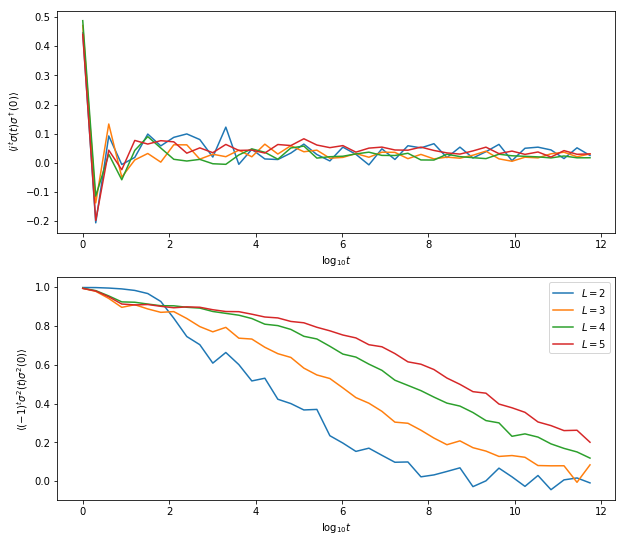

In [80]:
f, ax = plt.subplots(2,1,figsize=(10,9))
x=1.0
dataset=np.empty(0, dtype=dt)
for L in range(2,6):
    d=get_data('clock4/clock4_%d_%.2f.txt' %(L, x))
    dataset=np.append(dataset, d)
for sim in dataset:
    ax[0].plot(np.log10(sim['time_set']), sim['ReZ'],label= r'$L=$%d' % sim['L'])
    ax[1].plot(np.log10(sim['time_set']), sim['ReY'],label= r'$L=$%d' % sim['L'])
ax[0].set_xlabel(r'$\log_{10} t$')
ax[1].set_xlabel(r'$\log_{10} t$')
ax[0].set_ylabel(r'$\langle i^t\sigma (t)\sigma^\dagger(0)\rangle$')
ax[1].set_ylabel(r'$\langle (-1)^t\sigma^2 (t)\sigma^2(0)\rangle$')
plt.legend()
plt.show()


/u/shared/programs/x86_64/anaconda3/4.3.1/lib/python3.6/site-packages/ipykernel/__main__.py:32: ComplexWarning: Casting complex values to real discards the imaginary part


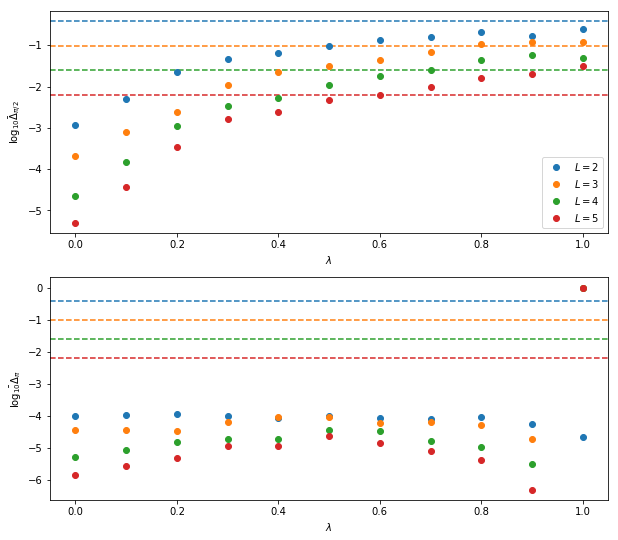

In [82]:
import matplotlib.lines as mlines
f, ax = plt.subplots(2,1,figsize=(10,9))
dataset=np.empty(0, dtype=dt)
handles=[]
for L in range(2,6):
    for x in np.linspace(0,1,11):
        d=get_data('clock4/clock4_%d_%.2f.txt' %(L, x))
        dataset=np.append(dataset, d)
    ax[0].axhline(y=np.log10(2*np.pi/4**L), linestyle='dashed', color='C%d' %(L-2))
    ax[1].axhline(y=np.log10(2*np.pi/4**L), linestyle='dashed', color='C%d' %(L-2))
    handles.append(mlines.Line2D([], [], color='C%d' %(L-2), linestyle='', marker='o', label=r'$L=$%d' % L))
for sim in dataset:
    ax[0].plot(sim['lambd'], sim['log10_shifted_gap'][0],marker='o',label= r'$L=$%d' % sim['L'], color='C%d' %(sim['L']-2))
    ax[1].plot(sim['lambd'], sim['log10_shifted_gap_2'][0], marker='o',label= r'$L=$%d' % sim['L'], color='C%d' %(sim['L']-2))
ax[0].legend(handles=handles)

ax[0].set_xlabel(r'$\lambda$')
ax[1].set_xlabel(r'$\lambda$')
ax[0].set_ylabel(r'$\bar{\log_{10} \Delta_{\pi/2}}$')
ax[1].set_ylabel(r'$\bar{\log_{10} \Delta_{\pi}}$')

plt.show()